
<!DOCTYPE html>
<html>
<body>
<div align="center">
    
<h1>Customer Analytics and Customer Insight Management</h1>


<h1>-------------------------------------------------------------------------</h1>
</div>
</body>
</html>

## Transactional dataset from an online Retail Store
###### This datasets hold information about the purchase history of customers including the amount, frequency and date of purchases
###### Our goal with this lesson is to clean this dataset and make it ready for performing Customer Analytics.

# PART 1: Clean the Dataset

In [4]:
# Python libraries to install: pandas, numpy and matplotlib.
# !pip install numpy pandas matplotlib

#### Import the necessary libraries

In [1]:
import pandas as pd

#### Import the dataset

In [6]:
# Read the CSV data as a Pandas DataFrame
transaction_df = pd.read_csv('transaction_dataset.csv', low_memory=False)

# Looking at the first five rows
transaction_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850.0,536365,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom


#### Check how large the dataset is looking at the shape of the dataframe 

In [7]:
# Printing the shape of the dataframe
transaction_df.shape

(541908, 5)

#### We must always clean a dataset before performing Customer Analytics.

##### 1. Check if the DataFrame has any null values in it.

In [8]:
# Checking for null values
transaction_df.isnull().sum()

CustomerID     135080
InvoiceNo           0
AmountSpent         0
InvoiceDate         0
Country             0
dtype: int64

There are two ways to handle such null values. We can either remove the data rows containing the null values or we can fill the null values with some statistical value using the mean, max, etc. of the column.

#### Drop all the data rows containing null values.

In [9]:
# Dropping the null values
transaction_df.dropna(inplace=True)

In [10]:
# Check for null values
transaction_df.isnull().sum()

CustomerID     0
InvoiceNo      0
AmountSpent    0
InvoiceDate    0
Country        0
dtype: int64

In [11]:
transaction_df.shape

(406828, 5)

#### The missing values have been successfully handled. Next, let us look at the data types of the various columns in the dataset.

In [12]:
# Printing a concise summary of the DataFrame
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406828 entries, 0 to 541907
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406828 non-null  float64
 1   InvoiceNo    406828 non-null  object 
 2   AmountSpent  406828 non-null  float64
 3   InvoiceDate  406828 non-null  object 
 4   Country      406828 non-null  object 
dtypes: float64(2), object(3)
memory usage: 18.6+ MB


There are three columns with the data type as object. Let us convert them to their appropriate data type. Here, CustomerID is being stored as a float value even though it is always an integer.


In [14]:
# Converting InvoiceNo from object to integer
transaction_df['InvoiceNo'] = transaction_df['InvoiceNo'].astype(int)

# Converting InvoiceDate from object to datetime
transaction_df['InvoiceDate'] = pd.to_datetime(transaction_df['InvoiceDate'])

# Converting Country from object to string
transaction_df['Country'] = transaction_df['Country'].astype(str)

The CustomerID column is currently holding values as float even though the data values are integer numbers. Let us convert its data type from float to integer as well.

In [15]:
# Converting CustomerID from float to integer
transaction_df['CustomerID'] = transaction_df['CustomerID'].astype(int)

Now, let us look at the head of the DataFrame to verify that the data types have been assigned appropriately.

In [16]:
# Looking at the first five rows
transaction_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [17]:
# Check the datatypes
transaction_df.dtypes

CustomerID              int32
InvoiceNo               int32
AmountSpent           float64
InvoiceDate    datetime64[ns]
Country                object
dtype: object

#### Check if all the numeric values in the dataset are proper or not.

In [18]:
# Getting a statistical description of the dataset
transaction_df.describe()

,CustomerID,InvoiceNo,AmountSpent
count,406828.000000,406828.000000,406828.000000
mean,15287.694552,560581.737412,20.401913
std,1713.600528,13105.458755,427.592241
min,12346.000000,536365.000000,-168469.600000
25%,13953.000000,549130.000000,4.200000
50%,15152.000000,561873.000000,11.100000
75%,16791.000000,572065.000000,19.500000
max,18287.000000,581587.000000,168469.600000


##### Fix the negative values in the AmountSpent column 

In [19]:
# Getting the positive value 
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].abs()

In [20]:
# Getting a statistical description of the dataset
transaction_df.describe()

,CustomerID,InvoiceNo,AmountSpent
count,406828.000000,406828.000000,406828.000000
mean,15287.694552,560581.737412,23.407303
std,1713.600528,13105.458755,427.438254
min,12346.000000,536365.000000,0.000000
25%,13953.000000,549130.000000,4.680000
50%,15152.000000,561873.000000,11.800000
75%,16791.000000,572065.000000,19.800000
max,18287.000000,581587.000000,168469.600000


We've successfully cleaned the dataset!

### Save the cleaned dataset as a new CSV file

In [21]:
# Saving as a new CSV file
transaction_df.to_csv('clean_dataset.csv', header=True, index=False)

# PART 2: Perform Customer Analytics

Importing the necessary libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Import our clean dataset

In [23]:
# Read the CSV data as a Pandas DataFrame
customer_df = pd.read_csv('clean_dataset.csv')

In [24]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


##### Determine how many rows of data are in the cleaned dataset by viewing the shape of the DataFrame


In [25]:
# Printing the shape of the DataFrame
customer_df.shape

(406828, 5)

##### Determining how many unique data values are present in each column of the DataFrame

In [26]:
# Printing the number of unique data values present in each column
customer_df.nunique()

CustomerID      4372
InvoiceNo      22189
AmountSpent     3027
InvoiceDate    20460
Country           37
dtype: int64

#### Ascertain the total number of unique customers per country.

In [27]:
# Getting the total number of unique customers per country
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


#### Assign this DataFrame to a variable, rename the column and sort it based on the number of unique customers per country.

In [28]:
# Getting the total number of unique customers per country
df_country = customer_df.groupby(['Country'])[['CustomerID']].nunique()

# Renaming the column names
df_country.columns = ['no_of_customers']

# Sorting the DataFrame based on the number of customers
df_country = df_country.sort_values('no_of_customers', ascending=False)

# Looking at the first five rows
df_country.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


#### Visualize using a bar plot

<AxesSubplot:xlabel='Country'>

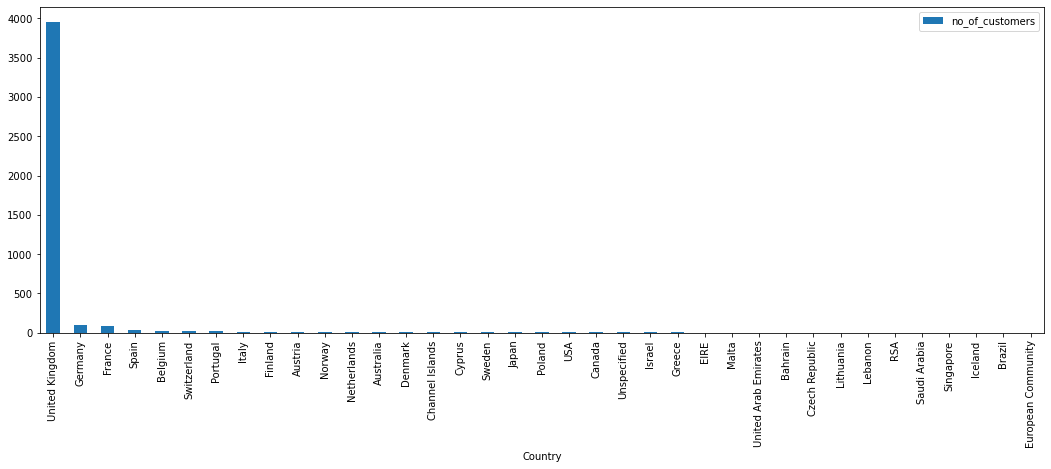

In [29]:
# Plotting a bar plot
df_country.plot(kind='bar', figsize = (18,6))

### Generate insights using the four methods of analytics we have learnt before:
###### i.e. Descriptive Analytics, Diagnostic Analytics, Predictive Analytics and Prescriptive Analytics

   - Using **Descriptive Analytics**, we can describe the plot stating that most of the customers of the online retail store are from the United Kingdom. Also, we can also conclude that most of the customers of the online retail store are based in Europe in comparison to other continents.

  -  Using **Diagnostic Analytics**, we can diagnose that the cause for the large number of customers coming in from Europe is because the online retail store must have heavily marketed itself in Europe rather than the other continents.

  -  Using **Predictive Analytics**, we can predict that the online retail store will continue getting more customers from the United Kingdom since there is already a massive number of customer base in the United Kingdom.

  -  Using **Prescriptive Analytics**, we can prescribe the online retail store to further invest in marketing in the United Kingdom since number of conversions are very good over there.


### Ascertain how the customers are generating revenue for the online retail store. 
For this, we will be calculating the total amount of transaction per month.

In [30]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


#### Extract the year and month information from the InvoiceDate column.

In [31]:
# Getting only the year and month from the date column
pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
406823    2011-12
406824    2011-12
406825    2011-12
406826    2011-12
406827    2011-12
Name: InvoiceDate, Length: 406828, dtype: object

In [32]:
# Assigning the extracted values to a new column 
customer_df['InvoiceYearMonth'] = pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [33]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,InvoiceYearMonth
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom,2010-12
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom,2010-12
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12


#### Calculate the total revenue amount for each month per year 
Find the sum of the column instead of the unique number of data elements.

In [34]:
# Getting the total revenue per month per year
df_revenue = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

# Looking at the first five rows
df_revenue.head()

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871


#### Plot the values to see the trend of amount spent by the customers for each month.

<AxesSubplot:xlabel='InvoiceYearMonth'>

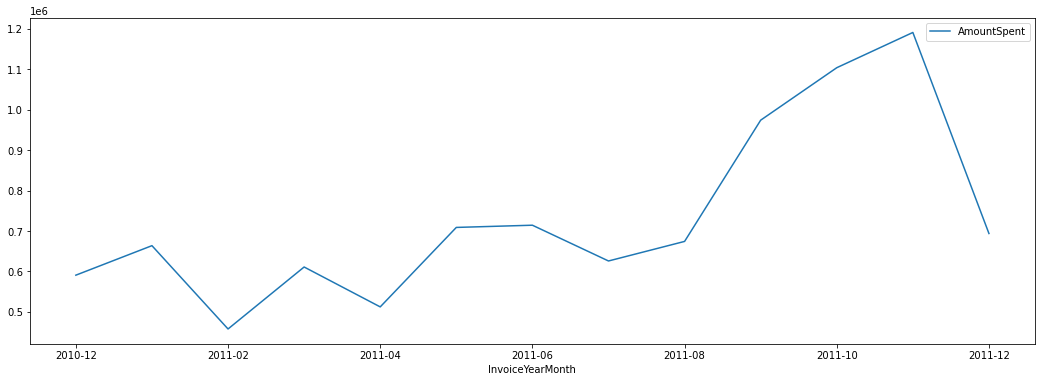

In [35]:
# Plotting a line plot
df_revenue.plot(kind='line', figsize = (18,6))

### Determine number of monthly active customers present in each month.

In [36]:
# Creating monthly active customers DataFrame by counting unique Customer IDs
df_monthly_active = customer_df.groupby('InvoiceYearMonth')[['CustomerID']].nunique()

# Renaming the column name
df_monthly_active.columns = ['no_of_unique_customers']

# Looking at the first five rows
df_monthly_active.head()

,no_of_unique_customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899


#### Plot the data using a bar plot

<AxesSubplot:xlabel='InvoiceYearMonth'>

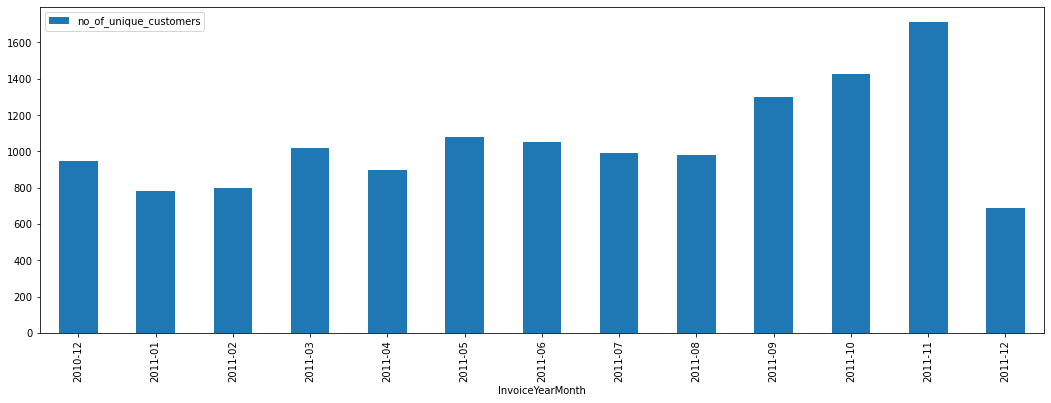

In [37]:
# Plotting a bar plot
df_monthly_active.plot(kind='bar', figsize = (18,6))

As an exercise, I would like to encourage you to generate insights on your own for the above active user per month plot using the four different method of analytics as we've already done before.